In [156]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.filter import high_pass_filter as filt
from mne.filter import low_pass_filter as hfilt

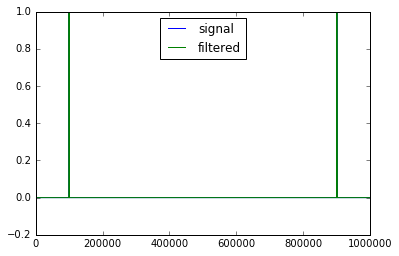

In [307]:
s = np.zeros(1000000)
s[100000] = 1
s[-100000] = 1

sf = filt(s, 10000, .5, method='iir', copy=True)

plt.plot(s, label='signal')
plt.plot(sf, label='filtered');
plt.legend(loc="upper center")

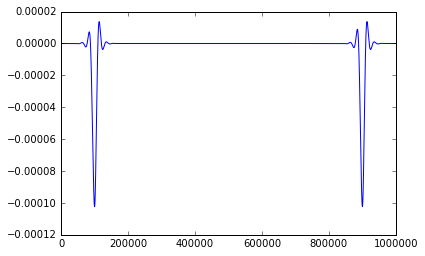

In [305]:
plt.plot(sf-s);

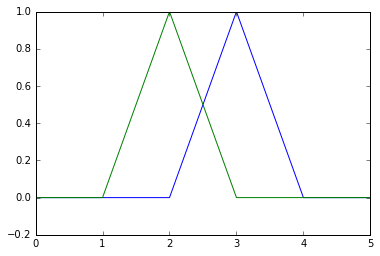

In [300]:
plt.plot(sf[99997:100003], label='signal');
plt.plot(s[99998:100004], label='filtered');
plt.legend(loc="upper center")

Correlation signal and filtered signal:  0.92931855143
Correlation design and filtered design:  0.930001413086


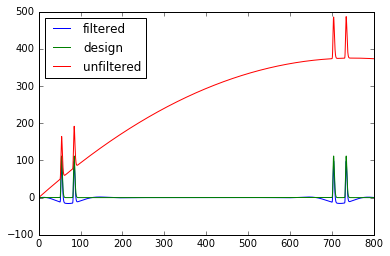

In [257]:
signal = np.hstack((np.zeros(5000),
                    hrf_signal, np.zeros(1000), hrf_signal, np.zeros(60000), 
                    hrf_signal, np.zeros(1000), hrf_signal,
                    np.zeros(5000)))
signal_noise = (np.arange(signal.shape[0]) / 100) - (((np.arange(signal.shape[0])) ** 2) / 15000000) + signal
time = np.arange(signal.shape[0]) / 100
signal_filt = filt(signal_noise, 100, .01, method='iir', copy=True)
design_filt = filt(signal, 100, .01, method='iir', copy=True)

plt.plot(time, signal_filt, label="filtered")
plt.plot(time, signal, label="design")
plt.plot(time, signal_noise, label="unfiltered")
plt.legend(loc="upper left")
plt.xlim(0, time[-1]);

print("Correlation signal and filtered signal: ", np.corrcoef(signal, signal_filt)[0, 1])
print("Correlation design and filtered design: ", np.corrcoef(signal, design_filt)[0, 1])

Correlation signal and filtered signal:  0.961297771074
Correlation design and filtered design:  0.961848098828


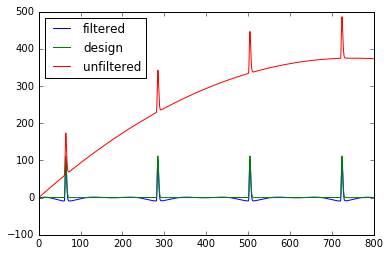

In [309]:
signal = np.hstack((np.zeros(6000),
                    hrf_signal, np.zeros(20000), hrf_signal, np.zeros(20000), 
                    hrf_signal, np.zeros(20000), hrf_signal,
                    np.zeros(6000)))
signal_noise = (np.arange(signal.shape[0]) / 100) - (((np.arange(signal.shape[0])) ** 2) / 15000000) + signal
time = np.arange(signal.shape[0]) / 100
signal_filt = filt(signal_noise, 100, .01, method='iir', copy=True)
design_filt = filt(signal, 100, .01, method='iir', copy=True)

plt.plot(time, signal_filt, label="filtered")
plt.plot(time, signal, label="design")
plt.plot(time, signal_noise, label="unfiltered")
plt.legend(loc="upper left")
plt.xlim(0, time[-1]);

print("Correlation signal and filtered signal: ", np.corrcoef(signal, signal_filt)[0, 1])
print("Correlation design and filtered design: ", np.corrcoef(signal, design_filt)[0, 1])

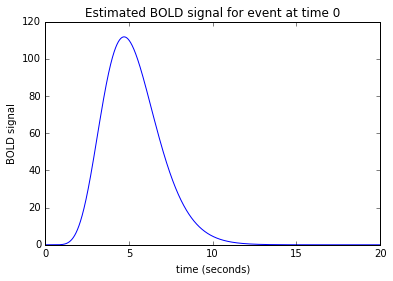

In [159]:
def hrf(t):
    "A hemodynamic response function"
    return t ** 8.6 * np.exp(-t / 0.547)

hrf_times = np.arange(0, 20, 0.01)
hrf_signal = hrf(hrf_times)
plt.plot(hrf_times, hrf_signal)
plt.xlabel('time (seconds)')
plt.ylabel('BOLD signal')
plt.title('Estimated BOLD signal for event at time 0')